<a href="https://colab.research.google.com/github/faizuddin/emotiv-eeg-experiment/blob/main/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [2]:
%cd "/content/gdrive/MyDrive/Colab Notebooks/postgraduate/tahmina"

/content/gdrive/MyDrive/Colab Notebooks/postgraduate/tahmina


In [3]:
!pwd

/content/gdrive/MyDrive/Colab Notebooks/postgraduate/tahmina


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# load dataset
df_eeg = pd.read_csv("data/eeg.csv")
df_interval = pd.read_csv("data/interval.csv")
df_response = pd.read_csv("data/response.csv")

In [ ]:
# work with just one user for now
USER_ID = 2

user_eeg = df_eeg[df_eeg["ID"] == USER_ID]
user_interval = df_interval[df_interval["ID"] == USER_ID]
user_response = df_response[df_response["ID"] == USER_ID]

In [17]:
# columns in user response dataframe
# correct response: "corrAns"
# stroop user responses: "key_resp.keys"
# flanker user: "key_resp_4.keys"

users = [1, 2, 3, 4, 5, 6, 7, 8]

# Trial marker ids for Stroop and Flanker (exclude practice sessions)
stroop_trial_ids = list(range(17,97))
flanker_trial_ids = list(range(115,205))

stroop_responses = pd.DataFrame(columns = ["User ID", "Trial ID", "Correct"])
flanker_responses = pd.DataFrame(columns = ["User ID", "Trial ID", "Correct"])

for i, u in enumerate(users):
    user_response = df_response[df_response["ID"] == u]

    # stroop
    tmp = user_response[user_response["key_resp.keys"].notnull()] # select only rows with user responses
    corrects = tmp["corrAns"] == tmp["key_resp.keys"]
    
    tmp1 = pd.DataFrame(corrects, columns=["Correct"])
    tmp1.insert(0, "User ID", u, True) # add user id column
    tmp1.insert(1, "Trial ID", stroop_trial_ids, True)
    
    stroop_responses = pd.concat([stroop_responses, tmp1], ignore_index=True)
    
    # flanker
    tmp = user_response[user_response["key_resp_4.keys"].notnull()] # select only rows with user responses
    corrects = tmp["corrAns"] == tmp["key_resp_4.keys"]
    
    tmp1 = pd.DataFrame(corrects, columns=["Correct"])
    tmp1.insert(0, "User ID", u, True) # add user id column
    tmp1.insert(1, "Trial ID", flanker_trial_ids, True)
    
    flanker_responses = pd.concat([flanker_responses, tmp1], ignore_index=True)


In [18]:
flanker_responses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User ID   720 non-null    object
 1   Trial ID  720 non-null    object
 2   Correct   720 non-null    object
dtypes: object(3)
memory usage: 17.0+ KB


In [20]:
stroop_responses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User ID   640 non-null    object
 1   Trial ID  640 non-null    object
 2   Correct   640 non-null    object
dtypes: object(3)
memory usage: 15.1+ KB


In [ ]:
cols = ["Total corrects", "Total incorrects"]
data1 = []
data2 = []

for u in users:
    tmp1 = stroop_responses["Correct"].loc[stroop_responses["User ID"]==u]
    tmp2 = flanker_responses["Correct"].loc[flanker_responses["User ID"]==u]

    #  stroop
    correct1 = sum(tmp1)
    incorrect1 = len(tmp1) - correct1    
    data1.append([correct1, incorrect1])
    
    # flanker
    correct2 = sum(tmp2)
    incorrect2 = len(tmp2) - correct2    
    data2.append([correct2, incorrect2])

df1 = pd.DataFrame(data1, columns=cols, index=users)
df2 = pd.DataFrame(data2, columns=cols, index=users)

Text(0, 0.5, 'Trial')

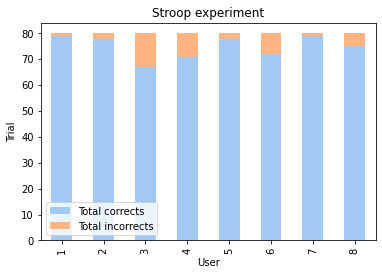

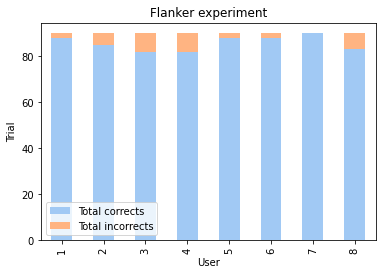

In [ ]:
# Corrects vs incorrects bar plots

# set the palette using the name of a palette:
sns.set_palette("pastel")

# plot the correct and incorrect responses
ax = df1.plot(kind="bar", stacked=True, title="Stroop experiment")
ax.set_xlabel("User")
ax.set_ylabel("Trial")

ax = df2.plot(kind="bar",stacked=True, title="Flanker experiment")
ax.set_xlabel("User")
ax.set_ylabel("Trial")

In [ ]:
# Correct and incorrect trial IDs

stroop_incorrect_trial_ids = stroop_responses.loc[stroop_responses["Correct"]==False]
stroop_correct_trial_ids = stroop_responses.loc[stroop_responses["Correct"]==True]
flanker_incorrect_trial_ids = flanker_responses.loc[flanker_responses["Correct"]==False]
flanker_correct_trial_ids = flanker_responses.loc[flanker_responses["Correct"]==True]

In [ ]:
# extract all trial timestamps from all participants
users = [1, 2, 3, 4, 5, 6, 7, 8]
stroop_ts = pd.DataFrame()
flanker_ts = pd.DataFrame()
for u in users:
    tmp = df_interval[(df_interval["ID"]==u) & (df_interval["marker_id"].isin(stroop_trial_ids))]
    stroop_ts = stroop_ts.append(tmp[["ID", "timestamp", "marker_id"]], ignore_index=True)
    tmp = flanker_trials_ts = df_interval[(df_interval["ID"]==u) & (df_interval["marker_id"].isin(flanker_trial_ids))]
    flanker_ts = flanker_ts.append(tmp[["ID", "timestamp", "marker_id"]], ignore_index=True)

In [ ]:
# extract eeg signals based on the timestamp
import datetime

# emotiv epoc+ is configured to sample signal at ~130Hz
SAMPLE_RATE = 130
PRE_SECS = 1 
POST_SECS = 1

users = [3]
ids = stroop_trial_ids[10]

# extract single trial
for u in users:
  for i in [ids]:
    ts = stroop_ts[(stroop_ts["ID"]==u) & (stroop_ts["marker_id"]==i)]
    tmp = df_eeg[(df_eeg["ID"]==u) & (df_eeg["Timestamp"]==ts.iloc[0,1])]

In [ ]:
import numpy as np

y = np.array([tmp.index.values])
y_start = y.item() - SAMPLE_RATE * PRE_SECS
y_end = y.item() + SAMPLE_RATE * POST_SECS

example = df_eeg[y_start:y_end]

In [ ]:
dt1 = datetime.datetime.fromtimestamp(example["Timestamp"].iloc[0])
dt2 = datetime.datetime.fromtimestamp(example["Timestamp"].iloc[-1])
dt_diff = dt2 - dt1
# minutes = dt_diff.total_seconds() / 60
# print('Total difference in minutes: ', minutes)
secs = dt_diff.total_seconds()
print('Difference in milliseconds: ', secs*1000)

Difference in milliseconds:  1009.895


### Epoc+ sensor mapping
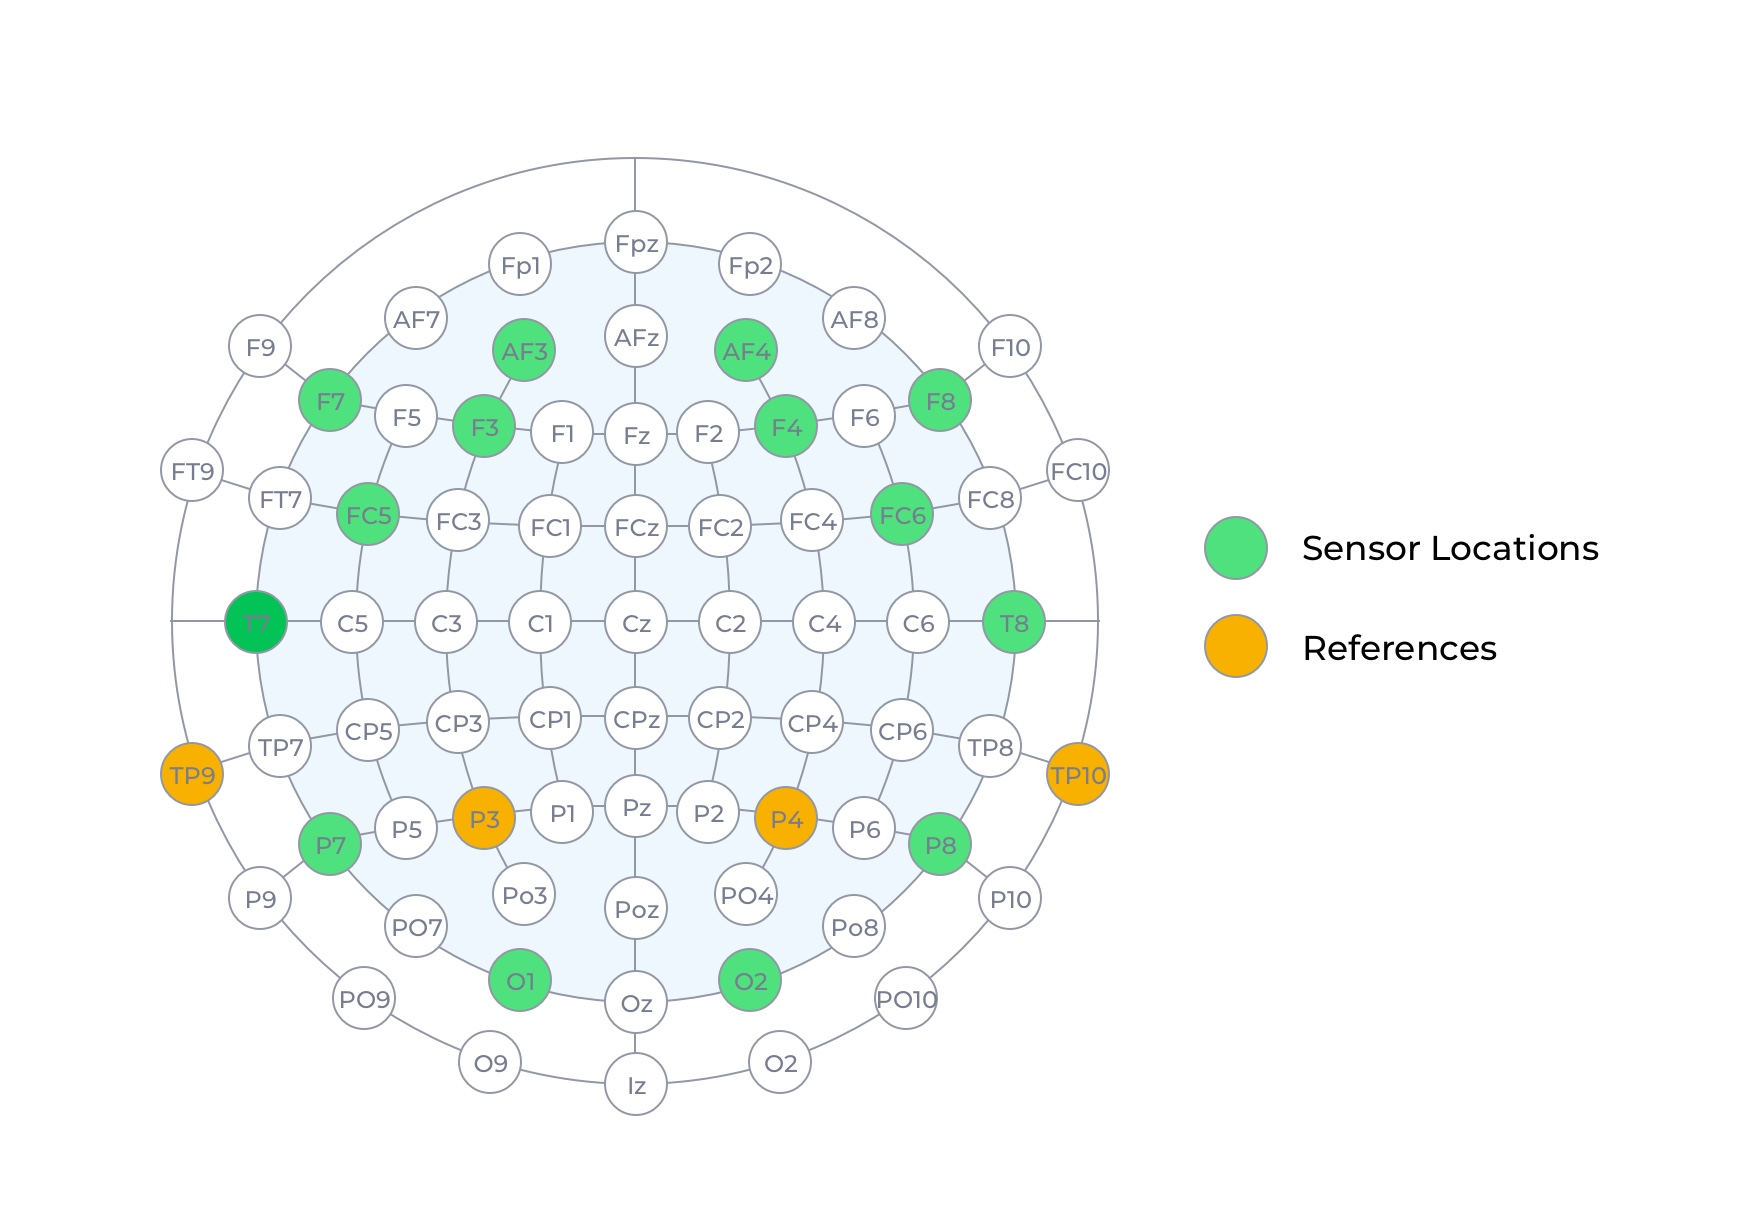

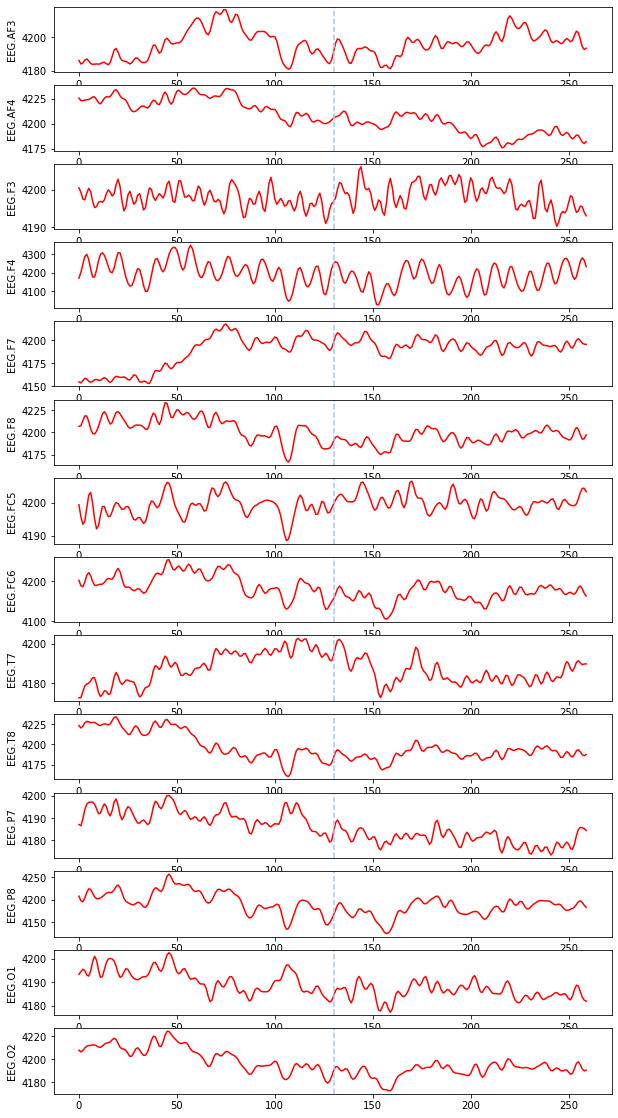

In [ ]:
# visualise one random example of EEG signal
channels = ["EEG.AF3","EEG.AF4","EEG.F3","EEG.F4","EEG.F7","EEG.F8","EEG.FC5","EEG.FC6","EEG.T7","EEG.T8","EEG.P7","EEG.P8","EEG.O1","EEG.O2"]
fig,ax =  plt.subplots(14, 1, figsize = (10, 20))

for c in channels:
  # plot each channel
  sns.lineplot(color = 'r', data = example, x=list(range(0, len(example[c]))), y=c, ax = ax[channels.index(c)])
  
  # response marker
  ax[channels.index(c)].axvline(SAMPLE_RATE, linestyle="--")

Total incorrects: 41


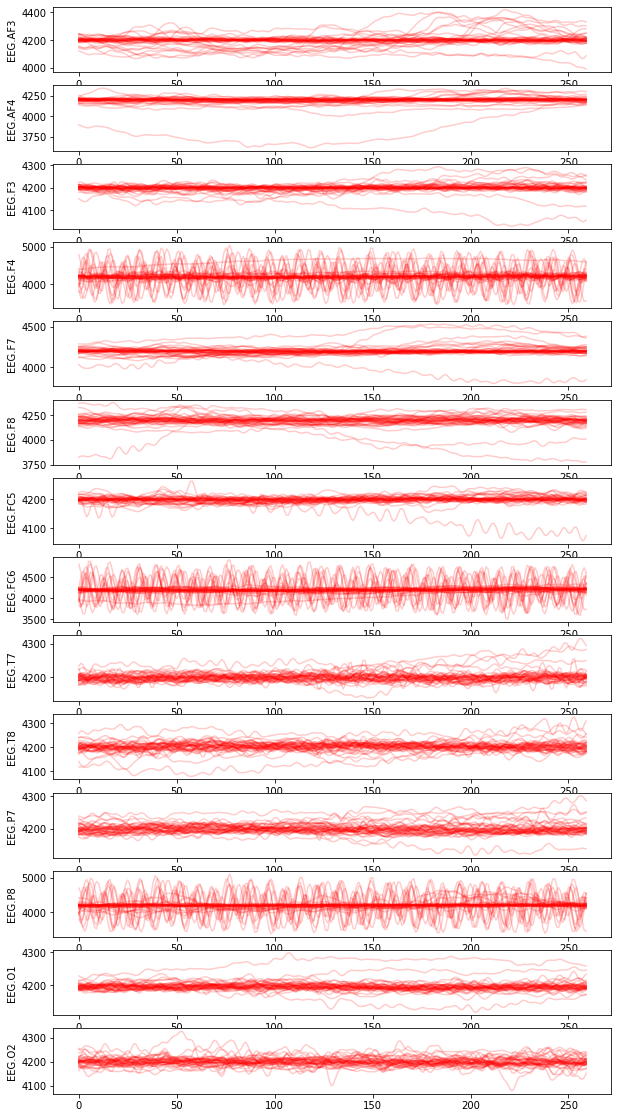

In [ ]:
# STROOP:visualise average of all incorrect signals from all users from all channels

fig,ax =  plt.subplots(14, 1, figsize = (10, 20))

# change the number of users to visualise
users = [1,2,3,4,5,6,7,8]

for c in channels:
  sample = []
  for u in users:
    ids = stroop_incorrect_trial_ids[stroop_incorrect_trial_ids["User ID"] == u]
    for idx, i in enumerate(ids["Trial ID"]):
      ts = stroop_ts[(stroop_ts["ID"]==u) & (stroop_ts["marker_id"]==i)]
      tmp = df_eeg[(df_eeg["ID"]==u) & (df_eeg["Timestamp"]==ts.iloc[0,1])]

      y = np.array([tmp.index.values])
      y_start = y.item() - SAMPLE_RATE * PRE_SECS
      y_end = y.item() + SAMPLE_RATE * POST_SECS

      # extract segment
      chans = df_eeg[y_start:y_end]

      # plot timeseries
      sns.lineplot(color='r', data=chans[channels], y=c, x=list(range(0, len(chans))), alpha=0.2, ax=ax[channels.index(c)])
      
      # append timeseries
      sample.append(chans[c])
      np_sample = np.array(sample)

   # plot signal timeseries mean
  # ax[channels.index(c)].plot(np_sample.mean(axis=0), color="red", linewidth="2", alpha=1.0)  
  
print("Total incorrects: %d" %np_sample.shape[0])

Total incorrects: 34


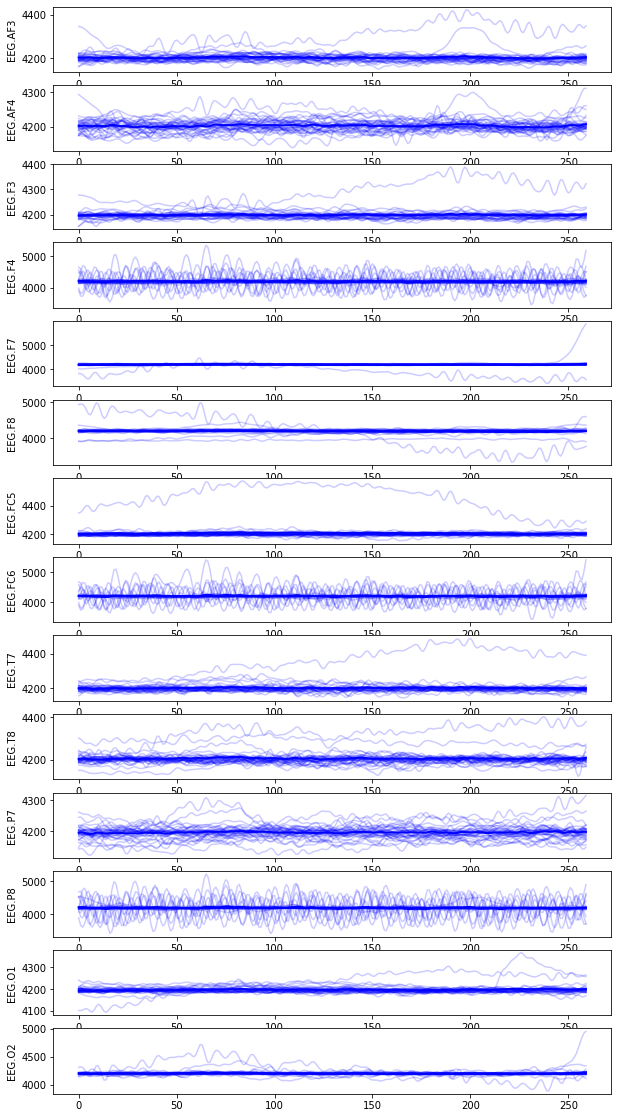

In [ ]:
# FLANKER:visualise average of all incorrect signals from all users from all channels

fig,ax =  plt.subplots(14, 1, figsize = (10, 20))

# change the number of users to visualise
users = [1,2,3,4,5,6,7,8]

for c in channels:
  sample = []
  for u in users:
    ids = flanker_incorrect_trial_ids[flanker_incorrect_trial_ids["User ID"] == u]
    for idx, i in enumerate(ids["Trial ID"]):
      ts = flanker_ts[(flanker_ts["ID"]==u) & (flanker_ts["marker_id"]==i)]
      tmp = df_eeg[(df_eeg["ID"]==u) & (df_eeg["Timestamp"]==ts.iloc[0,1])]

      y = np.array([tmp.index.values])
      y_start = y.item() - SAMPLE_RATE * PRE_SECS
      y_end = y.item() + SAMPLE_RATE * POST_SECS

      # extract segment
      chans = df_eeg[y_start:y_end]

      # plot timeseries
      sns.lineplot(color='b', data=chans[channels], y=c, x=list(range(0, len(chans))), alpha=0.2, ax=ax[channels.index(c)])
      
      # append timeseries
      sample.append(chans[c])
      np_sample = np.array(sample)

   # plot signal timeseries mean
  ax[channels.index(c)].plot(np_sample.mean(axis=0), color="blue", linewidth="2", alpha=1.0)  
  
print("Total incorrects: %d" %np_sample.shape[0])

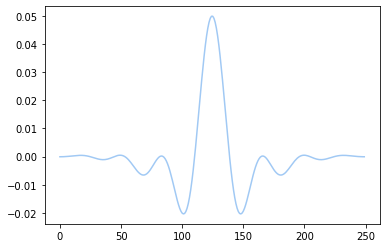

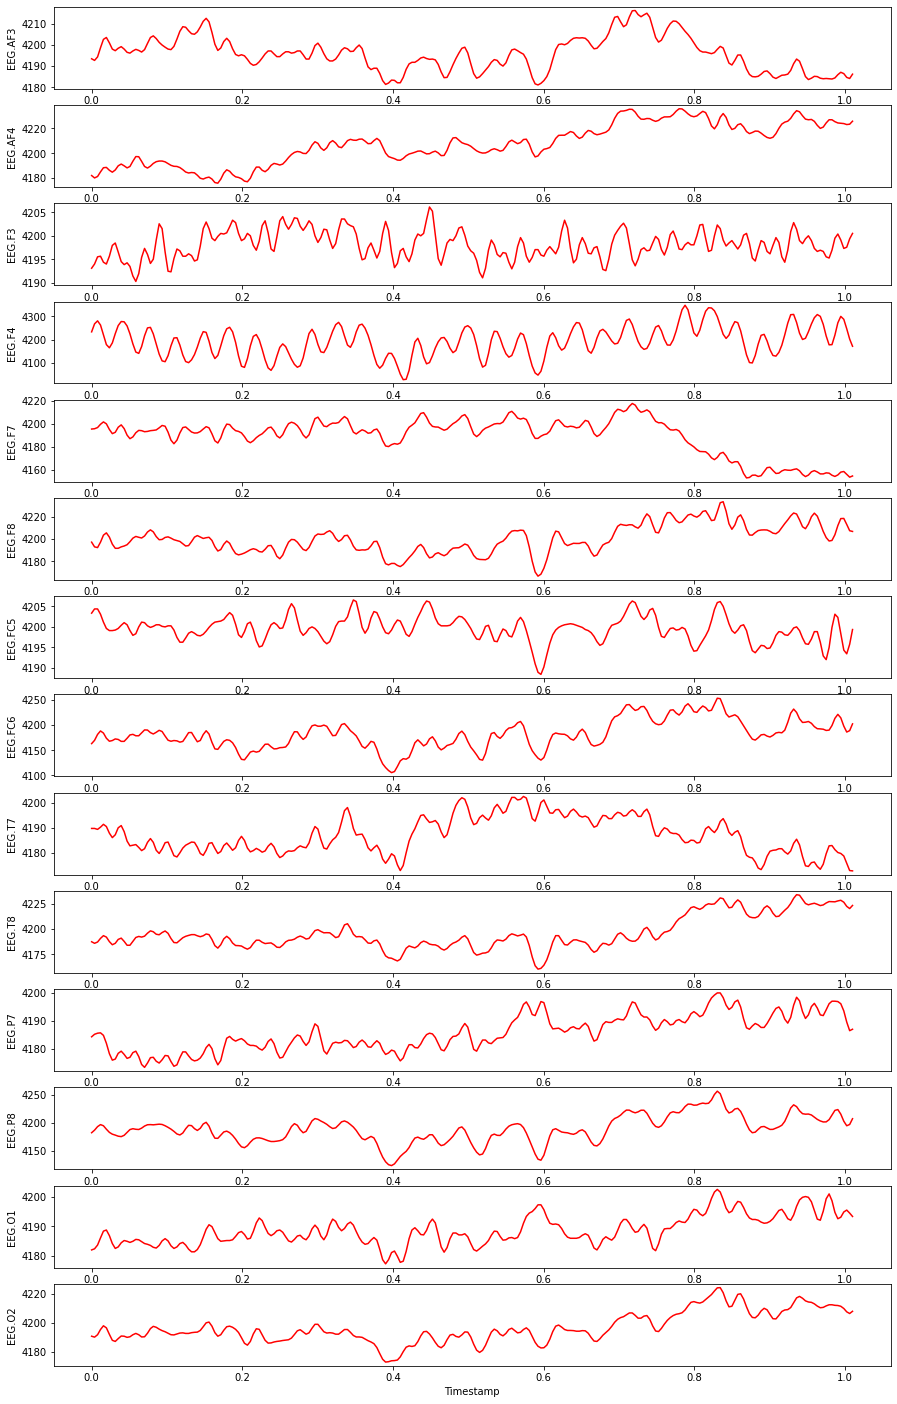

In [ ]:
from scipy import signal
from math import pi

sampling_freq = 100
duration = 2.0
t = np.arange(0.0, duration, 1/sampling_freq)

filter = signal.firwin(260, [0.01, 0.06], pass_zero=False)
plt.plot(filter)

fig2,ax2 =  plt.subplots(14, 1, figsize = (15, 25))

t = max(example["Timestamp"])-example["Timestamp"]

for c in channels:
  # plot each channel
  sns.lineplot(color = 'r', data = example, x=max(example["Timestamp"])-example["Timestamp"], y=c, ax = ax2[channels.index(c)])
  # plt.xlabel('time (s)')
  # filt_sig = signal.convolve(example[c], filter, mode='same')
  # ax2[channels.index(c)].plot(filt_sig,  color="blue", alpha=0.8)
  
  # response marker
  # ax[channels.index(c)].axvline(SAMPLE_RATE, linestyle="--")

In [ ]:
!pip install mne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 63.8 MB/s eta 0:00:00


In [ ]:
import mne